# A Small Recap

Ideal Gas

Isentropic Process

* $pV^{\gamma}=k$; $p=k\rho^{\gamma}$ -> $dp=\gamma k \rho^{\gamma -1}d\rho$

Isentropic Compression

* $\frac{T_2}{T_1}=(\frac{p_2}{p_1})^{\frac{\gamma-1}{\gamma}}$  >>>or<<<   $\frac{p_2}{p_1}=(\frac{T_2}{T_1})^{\frac{\gamma}{\gamma-1}}$


Bernoulli / Compressible 

* $\frac{p_0}{p} = (1+ \frac{\gamma-1}{2} M^2)^{\frac{\gamma}{\gamma - 1}} = (1+ \frac{V^2}{2 c_p T_s})^{\frac{\gamma}{\gamma - 1}}$

Compression Efficiency

* $\eta_c = \frac{w_{c,s}}{w_c} = \frac{h_{2}^\prime-h_1}{h_2-h_1} = \frac{c_p(T_{2}^\prime-T_1)}{c_p(T_2-T_1)}$

![037](pictures/compression_efficiency.svg)


Some basic relationships

$M=\frac{V}{\sqrt{\gamma RT_{static}}}$

$\gamma R = c_p (\gamma - 1)$

# Inlet Diffuser

The conditions far away from the engine, at Station "a" (for ambient), are:

$T_{a_{static}}$, $P_{a_{static}}$, and $M_a$

If we now define *sub "0"* to mean "stagnation"...

so $T_{01}$ is the stagnation pressure at station 1;

   $T_{0a}$ is the stagnation pressure at station "a"

and $T_{a}$ is the static pressure at station "a"

>>*fluid properties parenthesis*

#### Isentropic flow up to duct inlet

Let's assume there are no losses from Station "a" to Station 1.

$P_{01} = P_{0a} = P_{a} (1 + \frac{\gamma - 1}{2}M_a^{2})^\frac{\gamma}{\gamma -1} = P_{a} (1+ \frac{V_{a}^2}{2 c_p T_a})^{\frac{\gamma}{\gamma - 1}}$

$T_{01} = T_{0a} = T_{a} (1 + \frac{\gamma - 1}{2}M_a^{2}) = T_{a}+ (\frac{V_{a}^2}{2 c_p} )$

#### Adiabatic Duct

Inside the inlet duct, we have friction losses, but no heat transfer

$T_{02}=T_{01}=T_{0a} $ -> stagnation temperatures are the same

$=> T_{02}=T_{01}= T_{1} + \frac{V_1^2}{2c_{p1}}$

$T_{02} - T_{1} =  \frac{V_1^2}{2c_{p1}} $

$=> T_{1} + \frac{V_1^2}{2c_{p1}} = T_{2} + \frac{V_2^2}{2c_{p2}} $

$T_{2} = T_{1} + \frac{V_1^2}{2c_{p1}} - \frac{V_2^2}{2c_{p2}}$

#### if it was isentropic...

And if we had isentropic compression, we could write:

$\frac{p_{02}}{p_{1}} = (\frac{T_{02}^\prime}{T_{1}})^{\frac{\gamma}{\gamma -1}}$

which can be re-written as:

$\frac{p_{02}}{p_{1}} = (1 +  \frac{T_{02}^{'} - T_{1}}{T_{1}})^{\frac{\gamma}{\gamma -1}}$



#### considering the definition of inlet efficiency...



$\eta_i=\frac{T_{02}^{'}-T_{1}}{T_{02}-T_{1}}$

$T_{02}^{'}-T_{1}=\eta_i(T_{02}-T_{1})$ 

$\frac{p_{02}}{p_{1}} = (1 +  \frac{\eta_i(T_{02}-T_{1})}{T_{1}})^{\frac{\gamma}{\gamma -1}}$

But $T_{02} - T_{1} =  \frac{V_1^2}{2c_{p1}} $


$\frac{p_{02}}{p_{1}} = (1 + \frac{\eta_i V_1^2}{2c_{p1}T_{1}})^{\frac{\gamma}{\gamma -1}}$

#### mass flow

$\dot{m}=\rho V A$

In [1]:
#01 - preamble, imports

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [12, 7]
import cantera as ct
import ISA_module as ISA

###from engine_helper_functions import *

In [2]:
ct.__version__

'3.0.0'

In [3]:
# helper functions -> move to separate file

def get_p(ps:float, 
          gamma:float, 
          M:float)->float:
    '''
    This function calculates the stagnation pressure for isentropic process, given:
    
    ps: static pressure
    gamma: cp/cv for the gas
    M: Mach number
    '''
    return ps * ((1 + ((gamma - 1) / 2) * M**2)**(gamma / (gamma - 1)))


def get_T(Ts:float, 
          gamma:float, 
          M:float)->float:
    '''
    This function calculates the stagnation temperature for isentropic process, given:
    
    Ts: static temperature
    gamma: cp/cv for the gas
    M: Mach number
    '''
    return Ts * (1 + ((gamma - 1) / 2) * M**2)



def get_Ts(T:float, 
           gamma:float, 
           M:float)->float:
    '''
    This function calculates the static temperature for isentropic process, given:
    
    T: stagnation or toal temperature
    gamma: cp/cv for the gas
    M: Mach number
    '''
    return T / (1 + ((gamma - 1) / 2) * M**2)



def get_ps(p:float, 
           Ts:float, 
           Tt:float, 
           gamma:float)->float:
    '''
    This function calculates the static pressure for isentropic process, given:
    
    p: stagnation pressure
    Ts: static temperature
    Tt: stagnation temperature
    gamma: cp/cv for the gas
    '''
    return p * (Ts / Tt)**(gamma / (gamma - 1))



def get_gamma(gas:ct.Solution)->float:
    '''
    This function calculates gamma, given:
    
    gas: Cantera Solution object
    '''
    return gas.cp / gas.cv



def get_R(gas:ct.Solution)->float:
    '''
    This function calculates the gas constant, given:
    
    gas: Cantera Solution object
    '''
    return gas.cp - gas.cv



def get_a(gas:ct.Solution)->float:
    '''
    This function calculates the local speed of sound, given:
    
    gas: Cantera Solution object
    '''
    return np.sqrt(get_R(gas) * get_gamma(gas) * gas.T)



def print_prop(gas:ct.Solution):
    '''
    This function prints the properties for a given station
    
    gas : Cantera object with gas conditions
    '''
    
    print(f'p = {(gas.P / ct.one_atm):2.2f} atm,',
      f'T = {(gas.T):2.0f} K,',
      f'h = {(gas.enthalpy_mass):2.0f} kJ/kg,',
      f's = {(gas.entropy_mass):2.0f} kJ/kg,')

    
def print_stations(st:list, station_names:dict, gas:dict, M:dict):
    '''
    This function prints the properties of all stations
    
    st : list with stations
    station_names : dictionary with station names
    gas : dictionary with gas objects
    M : dictionary with Mach numbers
    '''
    
    for station in st:
        print(f'station {station:<7} ({station_names[station]:<22}): Mach {M[station]:.3f}, ', end="")
        print_prop(gas[station])


        
def plot_T_s(T:list, p:list, X:list, reaction_mechanism, phase_name):
    '''
    This function plots T-s states with isobars
    
    inputs
    T    : list with temperatures
    p    : list with pressures
    X    : list with gas composition

    
    returns
    fig : matplotlib figure
    '''

    to_st = len(T)
    dummy_gas = (ct.Solution(reaction_mechanism, phase_name))

    cycle_T = [0,0]
    cycle_s = [0,0]
    
    fig, ax = plt.subplots()

    for i in range(to_st):
        dummy_gas.TPX = T[i], p[i], X[i]
        
        # ISOBARS
        # create the T and s vectors for plotting the isobars
        curve_P = p[i]
        T_min = int(T[i]) - 100
        T_max = int(T[i]) + 400
    
        n = T_max - T_min
        s_isobar_data = []
        T_isobar_data = []

        for curve_T in range(T_min, T_max, 1):
            dummy_gas.TP = curve_T, curve_P
            s_isobar_data.append(dummy_gas.s)
            T_isobar_data.append(dummy_gas.T)
        ax.plot(s_isobar_data, T_isobar_data, linewidth=1, color='#31edd8', alpha=0.35)
        
        # State points
        # create point pairs to be able to trace a line
        dummy_gas.TPX = T[i], p[i], X[i]
        cycle_T[0] = cycle_T[1]
        cycle_s[0] = cycle_s[1]
        cycle_T[1] = dummy_gas.T
        cycle_s[1] = dummy_gas.entropy_mass
        if i != 0:
            ax.plot(cycle_s, cycle_T, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=4)
        

           
    ax.set_title('T-s Diagram')
    ax.set_xlabel('Entropy kJ/kg')
    ax.set_xlim(6800, 8500)
    ax.set_ylabel('Temperature K')
    ax.grid(visible=True, which='major', axis='both', alpha=0.1)
    
    return fig

In [4]:
#02 - engine parameters definitions

eng_param = {} # engine physical parameters will be stored in this dictionary

eng_perf = {} # engine performance parameters in this dictionary

# engine parameters
# inlet
#   physical parameters
eng_param['A1'] = 0.30 # m2 inlet area at station 1
eng_param['A2'] = 0.32 # m2 inlet exit area at face of compressor
#   performance parameters
eng_perf['eta_i'] = 0.98 # this can be upgraded to vary with Mach and m_dot

#--------------------------------------------------------------------------



In [5]:
#03 - inlet iterative function

def iterate_inlet(mdot:float, 
                  A:float, 
                  gas_in:ct.Solution, 
                  eta_i:float, 
                  M_in:float, 
                  gas_out:ct.Solution)->(float, bool):
    '''
    This function iterates the gas velocity at inlet exit until convergence
    
    inputs
    mdot : mass flow, in kg/s
    A     : area, in m2
    gas_in: Cantera solution object with gas at entrance of inlet
    T_in  : stagnation temperature of gas at entrance of inlet, in K
    p_in  : stagnation pressure of gas at entrance of inlet, in Pascals
    eta_i : inlet efficiency
    M_in  : Mach number for gas at entrance of inlet
    gas_out: Cantera solution object with gas at exit of inlet
    
    returns
    M_out : Mach number for gas at exit of inlet. Zero if no convergence reached
    convergence: True if converged, False if not
    indirect outputs
    gas_out: Cantera solution containing updated gas properties
    '''
    # loop control
    tol = 0.01 # tolerance to check for convergence
    max_iter = 100 # maximum number of iterations
    converged = False # keeps track of convergence
    n_iter = 0 #iteration counter
    
    # calculated input gas properties
    V_in = M_in * get_a(gas_in)
    gamma_in = get_gamma(gas_in)
    T_0in = get_T(gas_in.T, gamma_in, M_in)
    p_0in = get_p(gas_in.P, gamma_in, M_in)

    # initial guess
    T_0out = T_0in
    V_out_guess = mdot / (gas_in.density * A)
    gamma_out = gamma_in
    
    
    while not converged and n_iter <= max_iter:
        
        # calc properties using current guess
        
        T_out = gas_in.T + (V_in**2 / (2 * gas_in.cp) - V_out_guess**2 / (2 * gas_out.cp))
        p_0out = gas_in.P * (1 + eta_i * V_in**2 / (2 * gas_in.cp * gas_in.T))**(gamma_in / (gamma_in - 1))
        p_out = p_0out * (T_out / T_0out)**(gamma_out / (gamma_out - 1))
              
        # update gas to get new properties (especially density)
        gas_out.TP = T_out, p_out
        gamma_out = get_gamma(gas_out)
        
        # update velocity calculation with new gas properties
        V_out = V_out_guess
        V_out_guess = mdot / (gas_out.density * A)
        
        # check for convergnece
        if abs(V_out - V_out_guess) < tol:
            print(f'inlet finished, converged, niter={n_iter}')
            converged = True
            M_out = V_out / get_a(gas_out)
        elif n_iter < max_iter:
            n_iter += 1
        else:
            M_out = 0
            print(f'inlet finished, NOT converged, niter={n_iter}')
            
    return M_out, converged            

In [6]:
#04 - engine ambient/operating conditions

eng_op_con = {}
eng_op_con['throttle_pos'] = 1.0 # 1 is full throttle; .5 is idle
eng_op_con['mdot_guess'] = 20 # kg/s
eng_op_con['alt'] = 35000 # ft
eng_op_con['M_i'] = 0.8

M_i = eng_op_con['M_i'] # indicated Mach number - aircraft
V_i = ISA.M2Vt(eng_op_con['M_i'], eng_op_con['alt']) * ISA.kt2ms # true airspeed in kts
p_amb = ISA.p(eng_op_con['alt']) # static
T_amb = ISA.T(eng_op_con['alt']) # static

In [7]:
#05 - initial stations setup

gas = {} # dictionary with Cantera Solution (gas) objects for each station
M = {} # Mach number for each station

st = ["a", 1, 2, 3, 4, 5, 8] # station numbers
station_names = {st[0]:'ambient',
                 st[1]:'inlet',
                 st[2]:'inlet @ comp. face',
                 st[3]:'after compressor',
                 st[4]:'after combustor',
                 st[5]:'after turbine',
                 st[6]:'nozzle exit'}

# see https://github.com/Cantera/cantera/blob/main/data/nDodecane_Reitz.yaml
reaction_mechanism = 'nDodecane_Reitz.yaml'
phase_name = 'nDodecane_IG' # IG = ideal gas, other option is RK = Redlich-Kwong

comp_air = 'O2:0.209, N2:0.787, CO2:0.004' # composition of air
comp_fuel = 'c12h26:1' # composition of fuel


# initialize all stations with air, at ambient conditions
for station in st:
    gas[station] = (ct.Solution(reaction_mechanism, phase_name))
    gas[station].X = comp_air
    gas[station].TP = T_amb, p_amb
        
    M[station] = M_i

In [8]:
#06 - from Station "a" to Station 1

M_calc, conv = iterate_inlet(eng_op_con['mdot_guess'],
                             eng_param['A1'],
                             gas[st[0]],
                             1, # isentropic thus efficiency=1
                             M[st[0]],
                             gas[st[1]])

# we only assign the Mach number if we reached convergnece
if conv: M[st[1]] = M_calc

inlet finished, converged, niter=6


In [9]:
# create data set for plotting

st_T = []
st_p = []
st_X = []

# get T, p, X from each station that we already calculated
for x in range(0, 2):
    st_T.append(gas[st[x]].T)
    st_p.append(gas[st[x]].P)
    st_X.append(gas[st[x]].X)

station a       (ambient               ): Mach 0.800, p = 0.24 atm, T = 219 K, h = -133991 kJ/kg, s = 6986 kJ/kg,
station 1       (inlet                 ): Mach 0.469, p = 0.31 atm, T = 237 K, h = -116160 kJ/kg, s = 6986 kJ/kg,


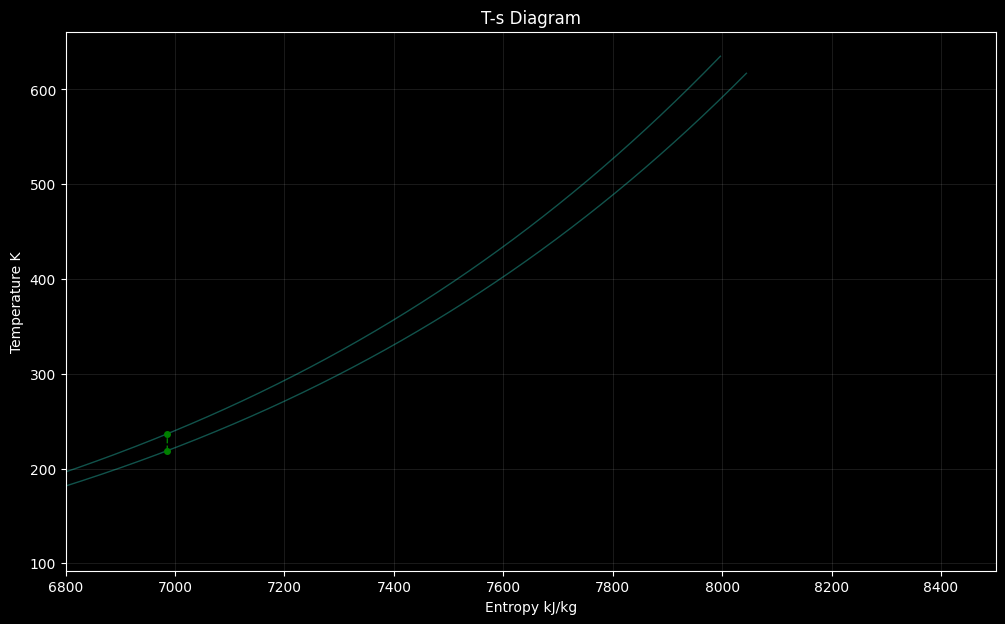

In [10]:
print_stations(st[0:2], station_names, gas, M)

myplot = plot_T_s(st_T, st_p, st_X, reaction_mechanism, phase_name)

In [11]:
#07 - from Station 1 to Station 2

M_calc, conv = iterate_inlet(eng_op_con['mdot_guess'] ,
                             eng_param['A2'],
                             gas[st[1]],
                             eng_perf['eta_i'],
                             M[st[1]],
                             gas[2])

# we only assign the Mach number if we reached convergnece
# and if we did, we now assume constant Mach throughout the machine
if conv: 
    n_st = len(st) #get number of stations
    current_st = st.index(2) #get index of current station
    for i in range(current_st, n_st):
        M[st[i]] = M_calc
else:
    print('ERROR: inlet did not converge')
    ###break

st_T.append(gas[st[2]].T)
st_p.append(gas[st[2]].P)
st_X.append(gas[st[2]].X)

inlet finished, converged, niter=4


station a       (ambient               ): Mach 0.800, p = 0.24 atm, T = 219 K, h = -133991 kJ/kg, s = 6986 kJ/kg,
station 1       (inlet                 ): Mach 0.469, p = 0.31 atm, T = 237 K, h = -116160 kJ/kg, s = 6986 kJ/kg,
station 2       (inlet @ comp. face    ): Mach 0.433, p = 0.31 atm, T = 238 K, h = -114651 kJ/kg, s = 6987 kJ/kg,


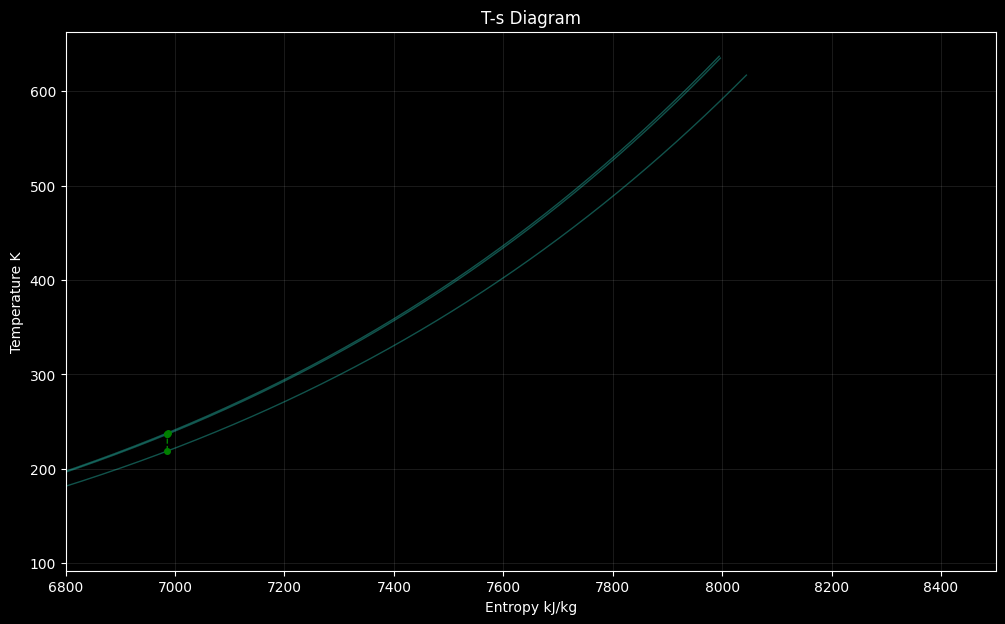

In [12]:
print_stations(st[0:3], station_names, gas, M)

myplot = plot_T_s(st_T, st_p, st_X, reaction_mechanism, phase_name)